In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_ComplexPie/'

In [3]:
final_df=pd.read_csv('ComplexPie_MS_PerStep.csv')

In [4]:
filtered_butter = final_df[final_df['Step'].str.strip() == 'Add butter']
filtered_butter

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
3,C001,36,Add butter,571.126297,849.580165,931.140785,945.605559,1027.631565,1652.806324,0.000000,0.000000
14,C003,58,Add butter,138.907986,221.940560,358.531351,277.606829,461.167238,310.717666,214.293608,176.908457
25,C006,42,Add butter,0.000000,219.353317,0.000000,0.000000,480.163224,275.516879,0.000000,0.000000
36,C008,34,Add butter,486.340683,710.046255,545.433451,590.988574,587.834617,1608.015947,1291.257148,984.417755
47,C009,24,Add butter,427.487776,540.538002,486.192224,477.866274,476.424223,1306.985480,963.798138,706.778471
58,C012,54,Add butter,219.754060,277.790749,462.263152,362.507467,559.533869,718.926158,541.175050,359.358999
69,C013,48,Add butter,267.877842,351.338373,390.964080,332.355571,502.944251,757.758025,542.357526,407.948128
80,C016,39,Add butter,441.033194,793.549599,935.947123,894.158513,1241.037214,1095.528796,972.735166,880.242172
91,C017,36,Add butter,232.424691,486.651381,324.683484,308.230312,421.582352,1018.188932,802.982397,558.415926
102,C020,30,Add butter,232.986416,456.555122,719.507307,567.454135,937.586417,478.588233,525.960772,292.956383


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_butter = filtered_butter.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_butter.select_dtypes(include=['float64', 'int64']).columns
filtered_butter[numerical_cols] = filtered_butter[numerical_cols].replace(0, np.nan)

filtered_butter[numerical_cols] = imputer.fit_transform(filtered_butter[numerical_cols])
filtered_butter

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
3,C001,36.0,Add butter,571.126297,849.580165,931.140785,945.605559,1027.631565,1652.806324,972.735166,880.242172
14,C003,58.0,Add butter,138.907986,221.940560,358.531351,277.606829,461.167238,310.717666,214.293608,176.908457
25,C006,42.0,Add butter,138.907986,219.353317,358.531351,277.606829,480.163224,275.516879,214.293608,176.908457
36,C008,34.0,Add butter,486.340683,710.046255,545.433451,590.988574,587.834617,1608.015947,1291.257148,984.417755
47,C009,24.0,Add butter,427.487776,540.538002,486.192224,477.866274,476.424223,1306.985480,963.798138,706.778471
58,C012,54.0,Add butter,219.754060,277.790749,462.263152,362.507467,559.533869,718.926158,541.175050,359.358999
69,C013,48.0,Add butter,267.877842,351.338373,390.964080,332.355571,502.944251,757.758025,542.357526,407.948128
80,C016,39.0,Add butter,441.033194,793.549599,935.947123,894.158513,1241.037214,1095.528796,972.735166,880.242172
91,C017,36.0,Add butter,232.424691,486.651381,324.683484,308.230312,421.582352,1018.188932,802.982397,558.415926
102,C020,30.0,Add butter,232.986416,456.555122,719.507307,567.454135,937.586417,478.588233,525.960772,292.956383


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Butter',
    'HeadCamera Distance': 'HeadCamera Distance - Add Butter',
    'LeftElbow Distance': 'LeftElbow Distance - Add Butter',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Butter',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Butter',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Butter',
    'RightElbow Distance': 'RightElbow Distance - Add Butter',
    'RightShoulder Distance': 'RightShoulder Distance - Add Butter'
}

# Rename columns
filtered_butter = filtered_butter.rename(columns=new_column_names)
filtered_butter

,Participant,Block Design Raw Score,Step,Chest Distance - Add Butter,HeadCamera Distance - Add Butter,LeftElbow Distance - Add Butter,LeftShoulder Distance - Add Butter,MotionControllerLeft Distance - Add Butter,MotionControllerRight Distance - Add Butter,RightElbow Distance - Add Butter,RightShoulder Distance - Add Butter
3,C001,36.0,Add butter,571.126297,849.580165,931.140785,945.605559,1027.631565,1652.806324,972.735166,880.242172
14,C003,58.0,Add butter,138.907986,221.940560,358.531351,277.606829,461.167238,310.717666,214.293608,176.908457
25,C006,42.0,Add butter,138.907986,219.353317,358.531351,277.606829,480.163224,275.516879,214.293608,176.908457
36,C008,34.0,Add butter,486.340683,710.046255,545.433451,590.988574,587.834617,1608.015947,1291.257148,984.417755
47,C009,24.0,Add butter,427.487776,540.538002,486.192224,477.866274,476.424223,1306.985480,963.798138,706.778471
58,C012,54.0,Add butter,219.754060,277.790749,462.263152,362.507467,559.533869,718.926158,541.175050,359.358999
69,C013,48.0,Add butter,267.877842,351.338373,390.964080,332.355571,502.944251,757.758025,542.357526,407.948128
80,C016,39.0,Add butter,441.033194,793.549599,935.947123,894.158513,1241.037214,1095.528796,972.735166,880.242172
91,C017,36.0,Add butter,232.424691,486.651381,324.683484,308.230312,421.582352,1018.188932,802.982397,558.415926
102,C020,30.0,Add butter,232.986416,456.555122,719.507307,567.454135,937.586417,478.588233,525.960772,292.956383


In [7]:

tracker_columns = ['Chest Distance - Add Butter', 'HeadCamera Distance - Add Butter', 'LeftElbow Distance - Add Butter', 'LeftShoulder Distance - Add Butter',
                   'RightElbow Distance - Add Butter', 'RightShoulder Distance - Add Butter', 'MotionControllerLeft Distance - Add Butter',
                   'MotionControllerRight Distance - Add Butter']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_butter, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_butter[block_design_col], filtered_butter[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_butter, tracker_columns, block_design_col)
correlation_df


,Tracker,Correlation,P-value
0,Chest Distance - Add Butter,-0.203841,0.448914
1,HeadCamera Distance - Add Butter,-0.227140,0.397554
2,LeftElbow Distance - Add Butter,-0.176384,0.513460
3,LeftShoulder Distance - Add Butter,-0.250185,0.350023
4,RightElbow Distance - Add Butter,-0.212703,0.428996
5,RightShoulder Distance - Add Butter,-0.255539,0.339460
6,MotionControllerLeft Distance - Add Butter,-0.051623,0.849414
7,MotionControllerRight Distance - Add Butter,-0.213865,0.426419


In [8]:
#filtered_butter.to_csv('ComplexPie_AddButter.csv',index=False)

In [9]:
'''tracker_columns = ['Chest Distance','HeadCamera Distance', 'LeftElbow Distance','LeftShoulder Distance','RightElbow Distance', 'RightShoulder Distance', 
    'MotionControllerLeft Distance','MotionControllerRight Distance']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_butter, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        filtered_df = filtered_butter[filtered_butter[tracker_col] != 0]
        
        # Calculate Spearman correlation and p-value
        correlation, p_value = spearmanr(filtered_df[block_design_col], filtered_df[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_butter, tracker_columns, block_design_col)
correlation_df'''

"tracker_columns = ['Chest Distance','HeadCamera Distance', 'LeftElbow Distance','LeftShoulder Distance','RightElbow Distance', 'RightShoulder Distance', \n    'MotionControllerLeft Distance','MotionControllerRight Distance']\nblock_design_col = 'Block Design Raw Score'\n\n# Function to calculate and display correlation for each tracker\ndef calculate_correlations(filtered_butter, tracker_columns, block_design_col):\n    correlations = []\n    for tracker_col in tracker_columns:\n        filtered_df = filtered_butter[filtered_butter[tracker_col] != 0]\n        \n        # Calculate Spearman correlation and p-value\n        correlation, p_value = spearmanr(filtered_df[block_design_col], filtered_df[tracker_col])\n        correlations.append({\n            'Tracker': tracker_col,\n            'Correlation': correlation,\n            'P-value': p_value\n        })\n    corr_df = pd.DataFrame(correlations)\n    return corr_df\n\n# Calculate and display correlations\ncorrelation_df = calcul

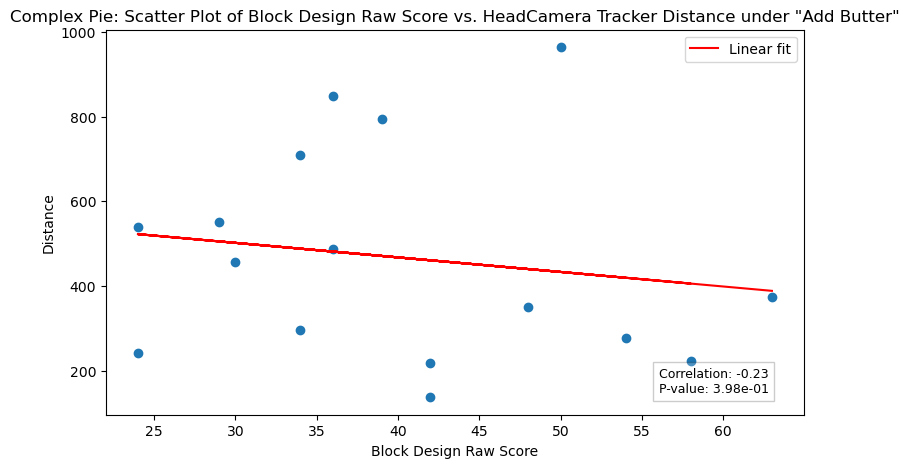

In [10]:
correlation, p_value = spearmanr(filtered_butter['Block Design Raw Score'], filtered_butter['HeadCamera Distance - Add Butter'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_butter['Block Design Raw Score'], filtered_butter['HeadCamera Distance - Add Butter'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_butter['Block Design Raw Score'], filtered_butter['HeadCamera Distance - Add Butter'], 1)
fit_line = slope * filtered_butter['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_butter['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. HeadCamera Tracker Distance under "Add Butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '17 CP_ButterDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

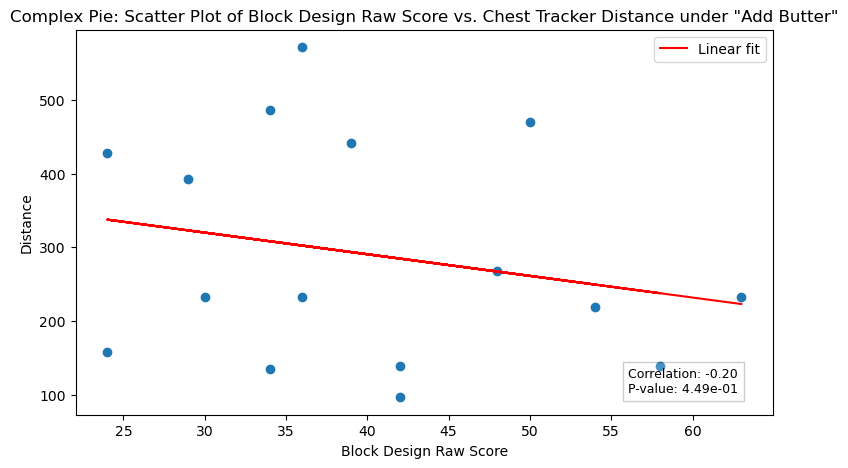

In [11]:
correlation, p_value = spearmanr(filtered_butter['Block Design Raw Score'], filtered_butter['Chest Distance - Add Butter'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_butter['Block Design Raw Score'], filtered_butter['Chest Distance - Add Butter'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_butter['Block Design Raw Score'], filtered_butter['Chest Distance - Add Butter'], 1)
fit_line = slope * filtered_butter['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_butter['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Add Butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '18 CP_ButterDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

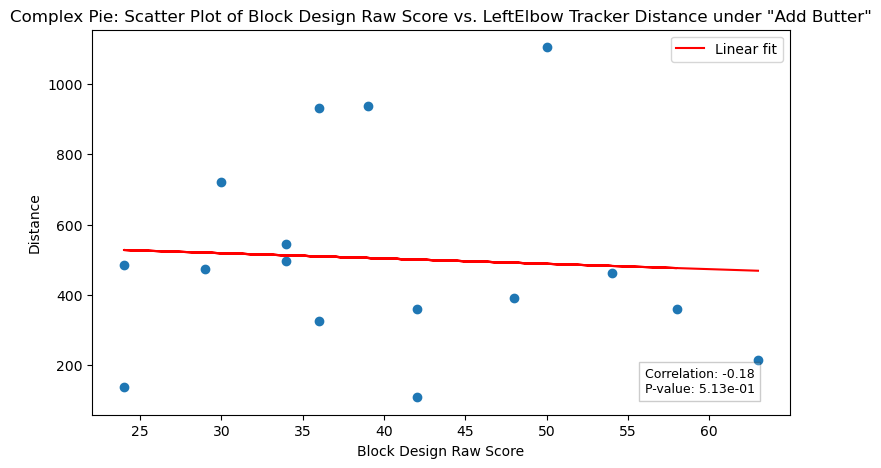

In [12]:
correlation, p_value = spearmanr(filtered_butter['Block Design Raw Score'], filtered_butter['LeftElbow Distance - Add Butter'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_butter['Block Design Raw Score'], filtered_butter['LeftElbow Distance - Add Butter'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_butter['Block Design Raw Score'], filtered_butter['LeftElbow Distance - Add Butter'], 1)
fit_line = slope * filtered_butter['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_butter['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. LeftElbow Tracker Distance under "Add Butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '19 CP_ButterDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

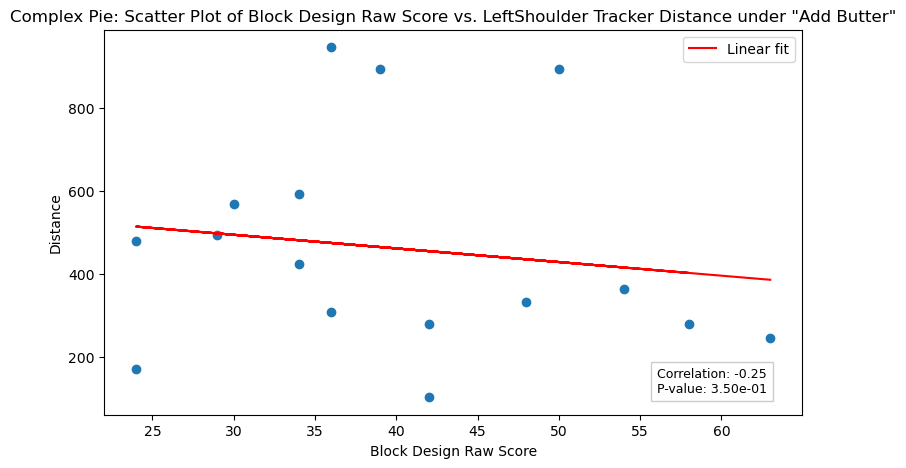

In [13]:
correlation, p_value = spearmanr(filtered_butter['Block Design Raw Score'], filtered_butter['LeftShoulder Distance - Add Butter'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_butter['Block Design Raw Score'], filtered_butter['LeftShoulder Distance - Add Butter'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_butter['Block Design Raw Score'], filtered_butter['LeftShoulder Distance - Add Butter'], 1)
fit_line = slope * filtered_butter['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_butter['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. LeftShoulder Tracker Distance under "Add Butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '20 CP_ButterDistanceLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

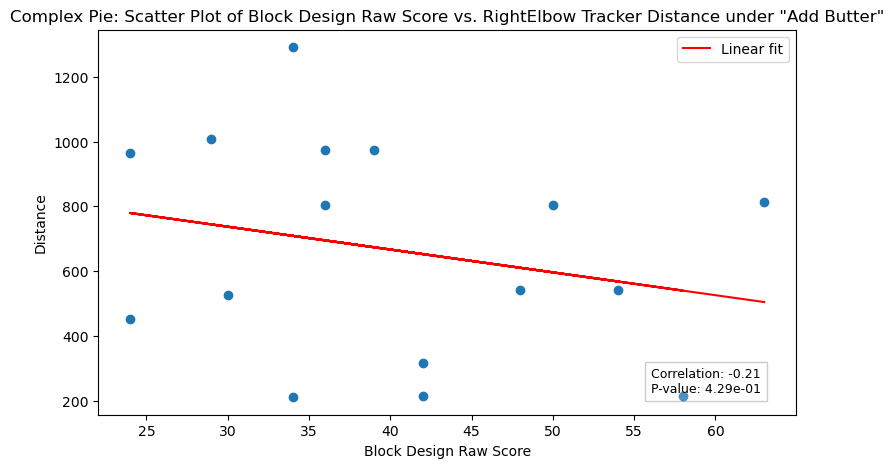

In [14]:
correlation, p_value = spearmanr(filtered_butter['Block Design Raw Score'], filtered_butter['RightElbow Distance - Add Butter'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_butter['Block Design Raw Score'], filtered_butter['RightElbow Distance - Add Butter'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_butter['Block Design Raw Score'], filtered_butter['RightElbow Distance - Add Butter'], 1)
fit_line = slope * filtered_butter['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_butter['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. RightElbow Tracker Distance under "Add Butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '21 CP_ButterDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

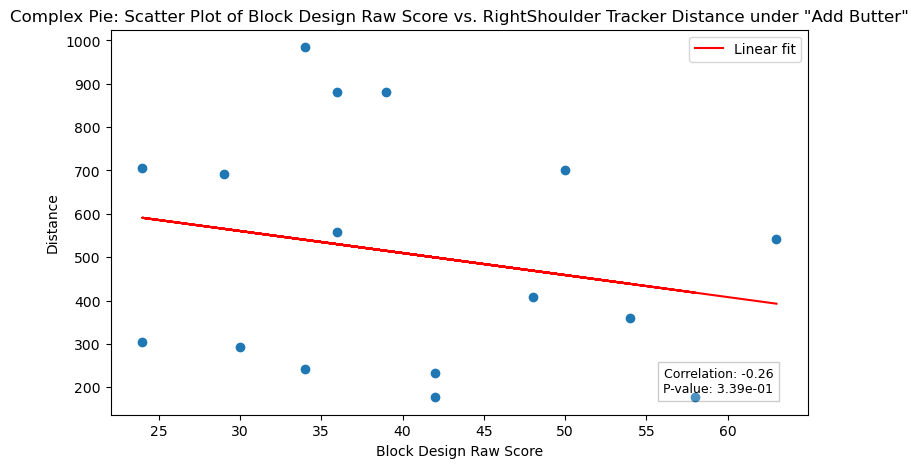

In [15]:
correlation, p_value = spearmanr(filtered_butter['Block Design Raw Score'], filtered_butter['RightShoulder Distance - Add Butter'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_butter['Block Design Raw Score'], filtered_butter['RightShoulder Distance - Add Butter'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_butter['Block Design Raw Score'], filtered_butter['RightShoulder Distance - Add Butter'], 1)
fit_line = slope * filtered_butter['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_butter['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. RightShoulder Tracker Distance under "Add Butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '22 CP_ButterDistanceRightShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

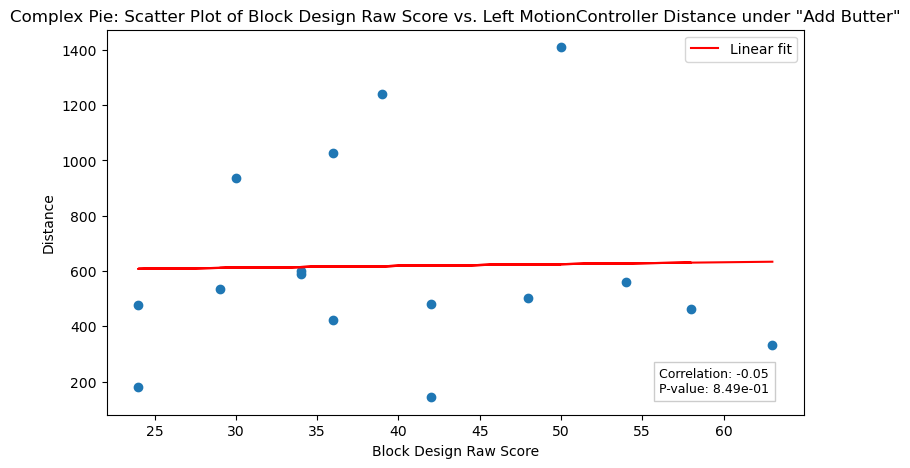

In [17]:
correlation, p_value = spearmanr(filtered_butter['Block Design Raw Score'], filtered_butter['MotionControllerLeft Distance - Add Butter'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_butter['Block Design Raw Score'], filtered_butter['MotionControllerLeft Distance - Add Butter'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_butter['Block Design Raw Score'], filtered_butter['MotionControllerLeft Distance - Add Butter'], 1)
fit_line = slope * filtered_butter['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_butter['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Add Butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '23 CP_ButterDistanceLeftController.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

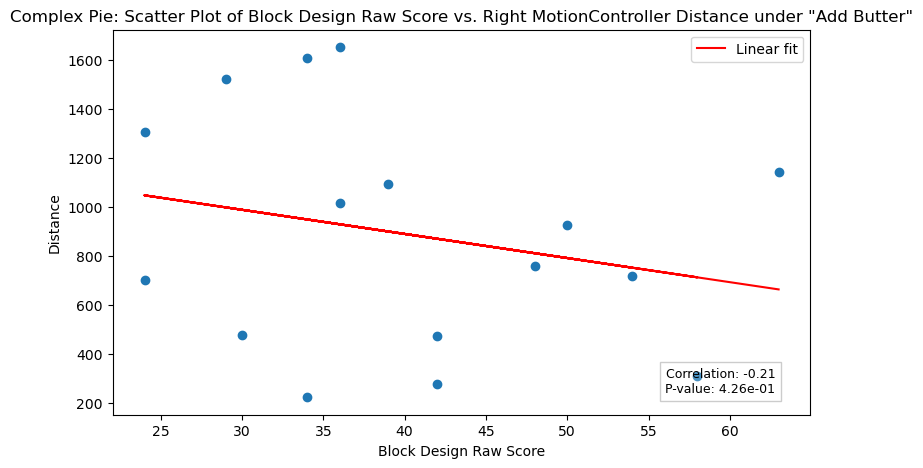

In [18]:
correlation, p_value = spearmanr(filtered_butter['Block Design Raw Score'], filtered_butter['MotionControllerRight Distance - Add Butter'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_butter['Block Design Raw Score'], filtered_butter['MotionControllerRight Distance - Add Butter'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_butter['Block Design Raw Score'], filtered_butter['MotionControllerRight Distance - Add Butter'], 1)
fit_line = slope * filtered_butter['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_butter['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Add Butter"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '24 CP_ButterDistanceRightController.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()